<img src="https://user-images.githubusercontent.com/18574951/90343540-a1181f80-e011-11ea-8ff5-bb21e5fdc71c.png">

# `vaex` @ MLOps community

## Modern data science with `vaex`: a new approach to DataFrames and pipelines

### New York Taxi Dataset (2009-2015): Exploratory Data Analysis and Machine Learning example (Part I)

https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [1]:
import vaex
from vaex.ui.colormaps import cm_plusmin

import numpy as np

import pylab as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

## Main concepts of `Vaex`
 - memory mappable storage
 - shallow copies
 - expression system:
     - delayed (a.k.a _lazy_) evaluations
     - efficient algorithms
 - emphasis on aggregate data properties instead of individual samples

### Memory mappable storage (read in the data)

In [2]:
# Check file size on disk
!du -h /data/yellow_taxi_*

108G	/data/yellow_taxi_2009_2015_f32.hdf5
28G	/data/yellow_taxi_2009_2015_f32.parquet
164G	/data/yellow_taxi_2009_2015.hdf5
12G	/data/yellow_taxi_2015_f32.arrow
12G	/data/yellow_taxi_2015_f32.hdf5


In [5]:
# Opens the data in hdf5 format
df = vaex.open('/data/yellow_taxi_2009_2015_f32.hdf5')

In [9]:
# Basic view of the contents
df

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.99196,40.721565,nan,nan,-73.993805,40.695923,8.9,0.5,nan,0.0,0.0,9.4
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.73629,nan,nan,-73.95585,40.76803,12.1,0.5,nan,2.0,0.0,14.6
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.35,-74.00259,40.739746,nan,nan,-73.86998,40.770226,23.7,0.0,nan,4.74,0.0,28.44
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5.0,-73.974266,40.790955,nan,nan,-73.99656,40.73185,14.9,0.5,nan,3.05,0.0,18.45
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.00158,40.719383,nan,nan,-74.00838,40.72035,3.7,0.0,nan,0.0,0.0,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,173,057,922",VTS,2015-12-31 23:59:56.000000000,2016-01-01 00:08:18.000000000,5,1,1.2,-73.99381,40.72087,1.0,0.0,-73.98621,40.72247,7.5,0.5,0.5,1.76,0.0,10.56
"1,173,057,923",CMT,2015-12-31 23:59:58.000000000,2016-01-01 00:05:19.000000000,2,2,2.0,-73.96527,40.76028,1.0,0.0,-73.939514,40.752388,7.5,0.5,0.5,0.0,0.0,8.8
"1,173,057,924",CMT,2015-12-31 23:59:59.000000000,2016-01-01 00:12:55.000000000,2,2,3.8,-73.9873,40.73908,1.0,0.0,-73.98867,40.6933,13.5,0.5,0.5,0.0,0.0,14.8
"1,173,057,925",VTS,2015-12-31 23:59:59.000000000,2016-01-01 00:10:26.000000000,1,2,1.96,-73.99756,40.725693,1.0,0.0,-74.01712,40.705322,8.5,0.5,0.5,0.0,0.0,9.8


In [10]:
# See the data types as usual
df.dtypes

vendor_id               large_string
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
payment_type            large_string
trip_distance                float32
pickup_longitude             float32
pickup_latitude              float32
rate_code                    float32
store_and_fwd_flag           float32
dropoff_longitude            float32
dropoff_latitude             float32
fare_amount                  float32
surcharge                    float32
mta_tax                      float32
tip_amount                   float32
tolls_amount                 float32
total_amount                 float32
dtype: object

### Shallow copies

In [12]:
useful_columns = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
                  'dropoff_datetime', 'dropoff_longitude', 'dropoff_latitude',
                  'passenger_count', 'payment_type', 'trip_distance', 
                  'fare_amount', 'tip_amount']

df2 = df[useful_columns]                  
df2

#,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_datetime,dropoff_longitude,dropoff_latitude,passenger_count,payment_type,trip_distance,fare_amount,tip_amount
0,2009-01-04 02:52:00.000000000,-73.99196,40.721565,2009-01-04 03:02:00.000000000,-73.993805,40.695923,1,CASH,2.63,8.9,0.0
1,2009-01-04 03:31:00.000000000,-73.9821,40.73629,2009-01-04 03:38:00.000000000,-73.95585,40.76803,3,Credit,4.55,12.1,2.0
2,2009-01-03 15:43:00.000000000,-74.00259,40.739746,2009-01-03 15:57:00.000000000,-73.86998,40.770226,5,Credit,10.35,23.7,4.74
3,2009-01-01 20:52:58.000000000,-73.974266,40.790955,2009-01-01 21:14:00.000000000,-73.99656,40.73185,1,CREDIT,5.0,14.9,3.05
4,2009-01-24 16:18:23.000000000,-74.00158,40.719383,2009-01-24 16:24:56.000000000,-74.00838,40.72035,1,CASH,0.4,3.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...
"1,173,057,922",2015-12-31 23:59:56.000000000,-73.99381,40.72087,2016-01-01 00:08:18.000000000,-73.98621,40.72247,5,1,1.2,7.5,1.76
"1,173,057,923",2015-12-31 23:59:58.000000000,-73.96527,40.76028,2016-01-01 00:05:19.000000000,-73.939514,40.752388,2,2,2.0,7.5,0.0
"1,173,057,924",2015-12-31 23:59:59.000000000,-73.9873,40.73908,2016-01-01 00:12:55.000000000,-73.98867,40.6933,2,2,3.8,13.5,0.0
"1,173,057,925",2015-12-31 23:59:59.000000000,-73.99756,40.725693,2016-01-01 00:10:26.000000000,-74.01712,40.705322,1,2,1.96,8.5,0.0


### Interactions with the data: standard DataFrame API

In [13]:
# Lets view a column
df.trip_distance

Expression = trip_distance
Length: 1,173,057,927 dtype: float32 (column)
---------------------------------------------
         0   2.63
         1   4.55
         2  10.35
         3      5
         4    0.4
       ...       
1173057922    1.2
1173057923      2
1173057924    3.8
1173057925   1.96
1173057926   1.06

In [14]:
# Let's view another
df['pickup_datetime']

Expression = pickup_datetime
Length: 1,173,057,927 dtype: datetime64[ns] (column)
----------------------------------------------------
         0  2009-01-04 02:52:00.000000000
         1  2009-01-04 03:31:00.000000000
         2  2009-01-03 15:43:00.000000000
         3  2009-01-01 20:52:58.000000000
         4  2009-01-24 16:18:23.000000000
                   ...                   
1173057922  2015-12-31 23:59:56.000000000
1173057923  2015-12-31 23:59:58.000000000
1173057924  2015-12-31 23:59:59.000000000
1173057925  2015-12-31 23:59:59.000000000
1173057926  2015-12-31 23:59:59.000000000

### Lazy evaluation

In [15]:
# For any computation, if printed/displayed, only a preview is shown
df.fare_amount / df.trip_distance

Expression = (fare_amount / trip_distance)
Length: 1,173,057,927 dtype: float32 (expression)
-------------------------------------------------
         0  3.38403
         1  2.65934
         2  2.28986
         3     2.98
         4     9.25
        ...        
1173057922     6.25
1173057923     3.75
1173057924  3.55263
1173057925  4.33674
1173057926  12.7358

### Expressions & Virtual Columns

<img src="meme-expressions.jpg">

In [16]:
# Define a virtual column. Virtual because it uses no memory! 
# It is evaluated on the fly when needed
df['fare_by_distance'] = (df.fare_amount / df.trip_distance)

# Display the DataFrame
df.head(5)

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,fare_by_distance
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4,3.38403
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6,2.65934
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.35,-74.0026,40.7397,nan,nan,-73.87,40.7702,23.7,0,nan,4.74,0,28.44,2.28986
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7319,14.9,0.5,nan,3.05,0,18.45,2.98
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7204,3.7,0,nan,0,0,3.7,9.25


### Filtering & Selections

In [18]:
# Calculate some more statistics
df.fare_by_distance.mean(progress='widget')

array(nan)

In [19]:
# Select only positive, non zero distances
df[df.trip_distance>0].fare_by_distance.mean(progress='widget')

array(6.0661801)

In [20]:
# Calculate a statistic with one pass over the data
df.mean('fare_by_distance', 
        selection=[
            df.trip_distance>0, 
            (df.trip_distance>0) & (df.passenger_count==2)], 
        progress='widget')

array([6.0661801 , 5.75052304])

### Evaluating expensive expressions

In [21]:
# Compute the arc-distance in miles
def arc_distance(theta_1, phi_1, theta_2, phi_2):
    temp = (np.sin((theta_2-theta_1)/2*np.pi/180)**2
           + np.cos(theta_1*np.pi/180)*np.cos(theta_2*np.pi/180) * np.sin((phi_2-phi_1)/2*np.pi/180)**2)
    distance = 2 * np.arctan2(np.sqrt(temp), np.sqrt(1-temp))
    return distance * 3958.8

# distance Los Angeles - Utrecht [miles]
arc_distance(34.052235, -118.243683, 52.0842715, 5.0124523)

5572.085459833974

In [22]:
# Add the arc-distance in miles as a virtual column
df['arc_distance_miles_numpy'] = arc_distance(df.pickup_longitude, df.pickup_latitude, 
                                              df.dropoff_longitude, df.dropoff_latitude)

df['arc_distance_miles_numpy'].sum(progress='widget')

array(1.49061009e+10)

Speed up the evaluation of "expensive " expressions via JIT (Just in Time) compilation. Support for:
- numba
- pythran
- cuda (NVidia GPUs)
<!-- - metal (GPUs on OSX, both ATI Radeon and M1) -->
- <span style="color:red"> **metal (GPUs on OSX, both ATI Radeon and M1)**</span>


In [23]:
# JIT via numba
df['arc_distance_miles_jit_numba'] = df.arc_distance_miles_numpy.jit_numba()
df['arc_distance_miles_jit_numba'].sum(progress='widget')


array(1.49061003e+10)

In [24]:
# JIT via cuda
df['arc_distance_miles_jit_cuda'] = df.arc_distance_miles_numpy.jit_cuda()
df['arc_distance_miles_jit_cuda'].sum(progress='widget')

array(1.4906101e+10)

### (Binned) Statistics

- 0-dimensional (simple statistics)

In [25]:
# The same be done via a DataFrame method
df.count(df.trip_distance, progress='widget')

array(1173057927)

- 1-dimensional (histogram)

In [26]:
# count the number of rows per pickup_latitude
df.count(binby=df.pickup_latitude, limits=[40.5, 41], shape=16, progress='widget')

array([    23436,     37055,    140003,    364258,  18673251,   8492798,
        70176504, 404278026, 545245606,  95674209,   5403892,    860256,
          162772,     67552,     36000,     24252])

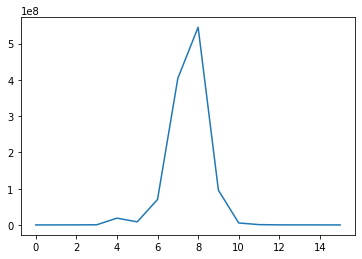

In [27]:
plt.plot(_);

- 2-dimensional (heatmap)

In [28]:
limits = [[-74.37, -73.54], [40.49, 40.92]]
counts2d = df.count(binby=[df.pickup_longitude, df.pickup_latitude], shape=128, limits=limits, progress='widget')
print(counts2d.shape)
print()
print(counts2d)

(128, 128)

[[  4   4   2 ...   9   5   5]
 [  2   8   5 ...   4   3   5]
 [  2   3 103 ...   4   6   4]
 ...
 [  3   5   5 ...  16   7   7]
 [  6  11   4 ...   5   5   8]
 [  1   5   2 ...   9   6   4]]


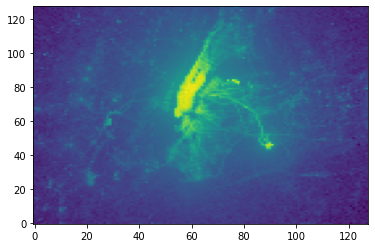

In [29]:
plt.imshow(np.log1p(counts2d).T, origin='lower', aspect='auto');

## Data exploration

<img src="https://miro.medium.com/max/403/1*TUw8sTRFiMgV0KRyUzjWmQ.jpeg">

### Abnormal number of passengers

In [30]:
df

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,fare_by_distance,arc_distance_miles_numpy,arc_distance_miles_jit_numba,arc_distance_miles_jit_cuda
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.99196,40.721565,nan,nan,-73.993805,40.695923,8.9,0.5,nan,0.0,0.0,9.4,3.38403,0.50494874,0.5049489,0.50494874
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.73629,nan,nan,-73.95585,40.76803,12.1,0.5,nan,2.0,0.0,14.6,2.6593406,1.9123319,1.9123317,1.9123318
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.35,-74.00259,40.739746,nan,nan,-73.86998,40.770226,23.7,0.0,nan,4.74,0.0,28.44,2.289855,9.18084,9.180839,9.18084
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5.0,-73.974266,40.790955,nan,nan,-73.99656,40.73185,14.9,0.5,nan,3.05,0.0,18.45,2.98,1.9083823,1.9083822,1.9083822
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.00158,40.719383,nan,nan,-74.00838,40.72035,3.7,0.0,nan,0.0,0.0,3.7,9.25,0.47004652,0.4700465,0.47004652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,173,057,922",VTS,2015-12-31 23:59:56.000000000,2016-01-01 00:08:18.000000000,5,1,1.2,-73.99381,40.72087,1.0,0.0,-73.98621,40.72247,7.5,0.5,0.5,1.76,0.0,10.56,6.2499995,0.52592033,0.5259203,0.5259203
"1,173,057,923",CMT,2015-12-31 23:59:58.000000000,2016-01-01 00:05:19.000000000,2,2,2.0,-73.96527,40.76028,1.0,0.0,-73.939514,40.752388,7.5,0.5,0.5,0.0,0.0,8.8,3.75,1.786019,1.7860186,1.786019
"1,173,057,924",CMT,2015-12-31 23:59:59.000000000,2016-01-01 00:12:55.000000000,2,2,3.8,-73.9873,40.73908,1.0,0.0,-73.98867,40.6933,13.5,0.5,0.5,0.0,0.0,14.8,3.5526316,0.87766147,0.8776615,0.8776614
"1,173,057,925",VTS,2015-12-31 23:59:59.000000000,2016-01-01 00:10:26.000000000,1,2,1.96,-73.99756,40.725693,1.0,0.0,-74.01712,40.705322,8.5,0.5,0.5,0.0,0.0,9.8,4.336735,1.4061309,1.4061307,1.4061309


In [32]:
df.passenger_count.value_counts(progress='widget').head(31)

1      812321234
2      172864560
5       81923912
3       51435890
6       25614703
4       24983486
0        3911410
208         1515
7            435
9            352
8            313
49            26
10            17
255           10
129            7
213            4
65             3
250            3
15             2
33             2
58             2
34             1
25             1
155            1
247            1
47             1
125            1
97             1
133            1
61             1
37             1
dtype: int64

In [33]:
# Filter abnormal number of passengers
df = df[(df.passenger_count>0) & (df.passenger_count<7)]

### Cleaning up distance values

In [34]:
df.trip_distance.value_counts(progress='widget').head(31)

1.0    27083666
0.9    26588407
0.8    26038355
1.1    25716789
1.2    24680775
0.7    24235015
1.3    23392894
1.4    22216026
0.6    21053491
1.5    20994639
1.6    19793518
1.7    18508315
1.8    17264557
0.5    16533295
1.9    16079268
2.0    15375123
2.1    13934161
2.2    12950627
2.3    12016676
2.4    11192204
0.4    11149483
2.5    10438690
2.6     9757307
2.7     9123151
2.8     8548141
2.9     7964831
0.0     7844587
3.0     7614737
3.1     6996349
3.2     6571892
3.3     6169651
dtype: int64

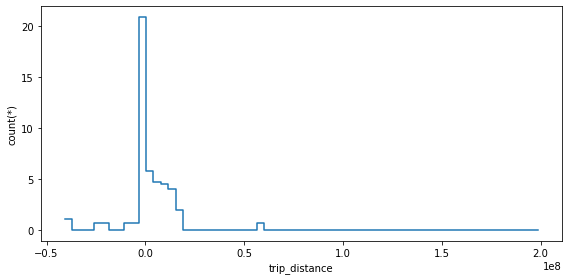

In [35]:
# Make a histograms of the trip distances (miles)
plt.figure(figsize=(8,4))
df.viz.histogram('trip_distance', f='log1p', progress='widget')
plt.show()

In [36]:
# What is the largest distance?
_ = df.trip_distance.max()

print(_, 'miles.')

print('This is %3.1f times larger than the distance between the Earth and the Moon!' % (_ / 238_900))
print('or')
print('This is %1.1f the distance to Mars!' % (_ / 33_900_000))

198623000.0 miles.
This is 831.4 times larger than the distance between the Earth and the Moon!
or
This is 5.9 the distance to Mars!


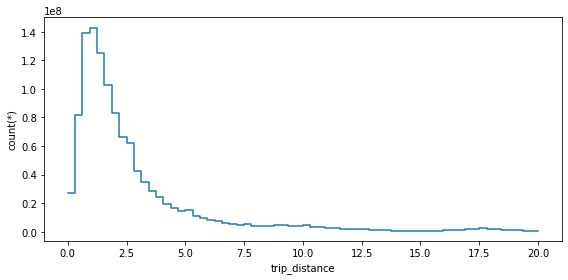

In [37]:
# Make another histogram of the trip distances, this time with a more sensible range
plt.figure(figsize=(8,4))
df.viz.histogram('trip_distance', limits=[0, 20], progress='widget')
plt.show()

In [38]:
# Filter negative and too large distances
df = df[(df.trip_distance>0) & (df.trip_distance<10)]

### What _is_ New York City really?

In [39]:
# # Interactively plot the pickup locations - helps to determine the extent of NYC covered by the taxi company
df.widget.heatmap(df.pickup_longitude, 
                  df.pickup_latitude, 
                  shape=512, 
                  transform='log1p', 
                  colormap='plasma')

Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

In [40]:
# Define the NYC boundaries
long_min = -74.05
long_max = -73.75
lat_min = 40.58
lat_max = 40.90

# Make a selection based on the boundaries
df = df[(df.pickup_longitude > long_min)  & (df.pickup_longitude < long_max) & \
        (df.pickup_latitude > lat_min)    & (df.pickup_latitude < lat_max) & \
        (df.dropoff_longitude > long_min) & (df.dropoff_longitude < long_max) & \
        (df.dropoff_latitude > lat_min)   & (df.dropoff_latitude < lat_max)]

### Create some features

In [41]:
# Time in transit (minutes)
df['trip_duration_min'] = (df.dropoff_datetime - df.pickup_datetime) / np.timedelta64(1, 'm')

# Speed (miles per hour)
df['trip_speed_mph'] = df.trip_distance / ((df.dropoff_datetime - df.pickup_datetime) / np.timedelta64(1, 'h'))



### Trip duration

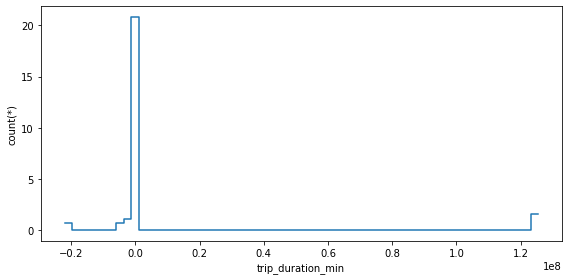

In [42]:
# Histogram of the drip durations (minutes)
plt.figure(figsize=(8,4))
df.viz.histogram('trip_duration_min', f='log1p', progress='widget')
plt.show()

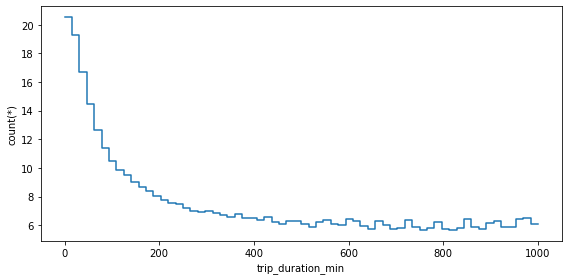

In [43]:
# Histogram of the drip durations, now with more sensible ranges
plt.figure(figsize=(8,4))
df.viz.histogram('trip_duration_min', f='log1p', limits=[0, 1000], progress='widget')
plt.show()

In [44]:
# Filter, keep durations that are within 2 hours
df = df[(df.trip_duration_min>5) & (df.trip_duration_min<120)]

### Trip speed

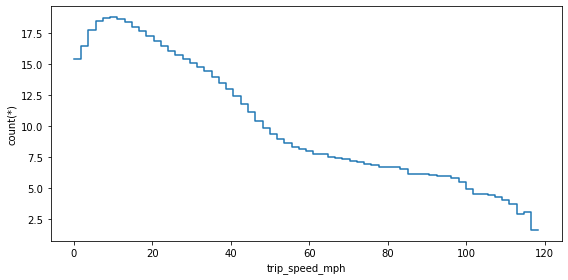

In [45]:
# Histogram of the drip durations, now with more sensible ranges
plt.figure(figsize=(8,4))
df.viz.histogram('trip_speed_mph', f='log1p', progress='widget')
plt.show()

In [46]:
# Filter, keep trips with average speeds between 2 and 60 miles per hour
df = df[(df.trip_speed_mph>=2) & (df.trip_speed_mph<=60)]

### Fare amount

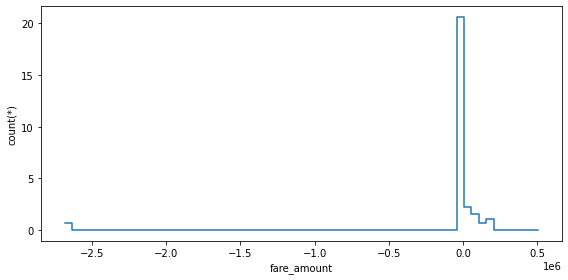

In [47]:
# Histogram of the fare amount column
plt.figure(figsize=(8,4))
df.viz.histogram('fare_amount', f='log1p', progress='widget')
plt.show()

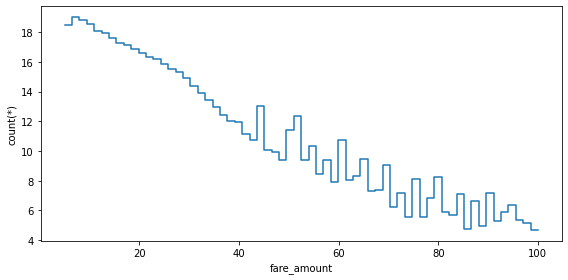

In [49]:
# Histogram of the fare amount column
plt.figure(figsize=(8, 4))
df.viz.histogram('fare_amount', f='log1p', progress='widget', limits=[5, 100])
plt.show()

In [50]:
# Filter out negative and absurdly large fares
df = df[(df.fare_amount>=5) & (df.fare_amount<=100)]

### Fare by distance

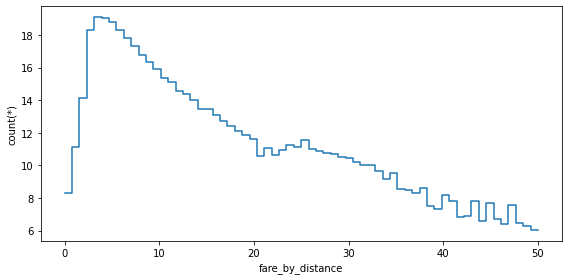

In [51]:
plt.figure(figsize=(8, 4))
df.fare_by_distance.viz.histogram(progress='widget', limits=[0, 50], f='log1p')
plt.show()

In [52]:
# Select only trips with fare by distance between [0.75 and 20]
df = df[(df.fare_by_distance>=0.75) & (df.fare_by_distance<=20)]

### Create some date/time features

In [53]:
# Daily activities

# Hour of day
df['pu_hour'] = df.pickup_datetime.dt.hour

# Day of week
df['pu_day_of_week'] = df.pickup_datetime.dt.dayofweek

# Day of week
df['pu_month_of_year'] = df.pickup_datetime.dt.month - 1

# lists to help with the labeling
weekday_names_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [54]:
# Treat these columns as ordinal encoded values
df = df.categorize(column='pu_hour')
df = df.categorize(column='pu_day_of_week', labels=weekday_names_list)

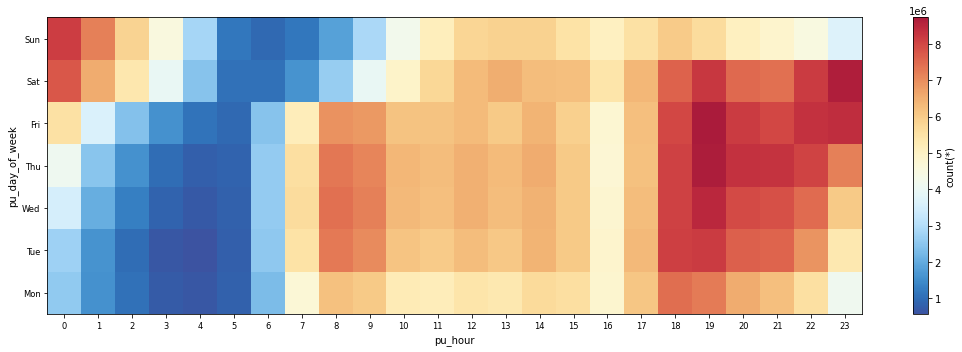

In [55]:
# Number of pick-ups per hour for a given day of the week
df.viz.heatmap('pu_hour', 'pu_day_of_week', colorbar=True, colormap=cm_plusmin, figsize=(15, 5))
plt.xticks(np.arange(24), np.arange(24))
plt.show()

### Groupby - simple example

In [56]:
df_per_hour = df.groupby(by=df.pu_hour, progress='widget',
                         agg={'tip_amount': 'mean',
                              'tip_couple': vaex.agg.mean('tip_amount', selection='passenger_count==2')},
                            )

# Display the grouped DataFrame
df_per_hour

#,pu_hour,tip_amount,tip_couple
0,0,1.1985474546830044,1.1465317443017895
1,1,1.1838193071694263,1.1483800115540939
2,2,1.1725203586941932,1.1479771582132865
3,3,1.1452598927878044,1.1322725091649761
4,4,1.076864198671994,1.0607482711077678
...,...,...,...
19,19,1.1731349509847044,0.9903990087064042
20,20,1.1573564010345654,1.0508824651590256
21,21,1.1915283457630832,1.0819958016749585
22,22,1.2068160394810972,1.1099904121017021


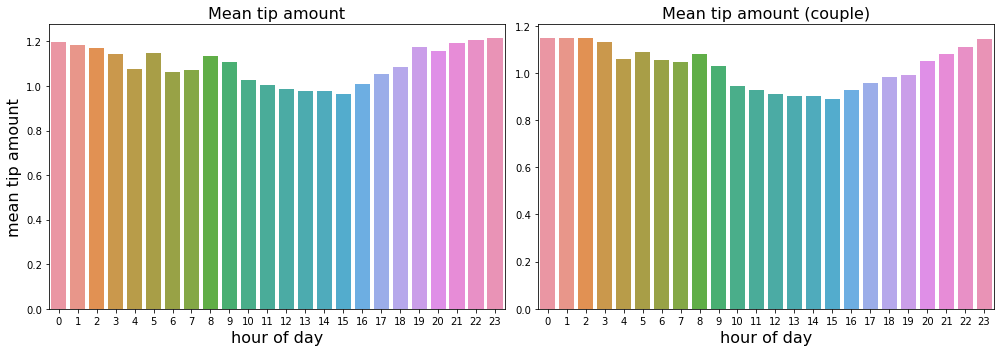

In [57]:
plt.figure(figsize=(14, 5))
fontsize = 16

plt.subplot(121)
sns.barplot(x=df_per_hour.pu_hour.to_numpy(), y=df_per_hour.tip_amount.to_numpy())
plt.title('Mean tip amount', fontsize=fontsize)
plt.xlabel('hour of day', fontsize=fontsize)
plt.ylabel('mean tip amount', fontsize=fontsize)

plt.subplot(122)
sns.barplot(x=df_per_hour.pu_hour.to_numpy(), y=df_per_hour.tip_couple.to_numpy())
plt.title('Mean tip amount (couple)', fontsize=fontsize)
plt.xlabel('hour of day', fontsize=fontsize)


plt.tight_layout()
plt.show()

### Join

In [58]:
# Join the grouped dataframe on the primary one on the hour of pickup
df_joined = df.join(df_per_hour, on='pu_hour', rprefix="right_")

# Preview
df_joined

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,fare_by_distance,arc_distance_miles_numpy,arc_distance_miles_jit_numba,arc_distance_miles_jit_cuda,trip_duration_min,trip_speed_mph,pu_hour,pu_day_of_week,pu_month_of_year,right_pu_hour,right_tip_amount,tip_couple
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.99196,40.721565,nan,nan,-73.993805,40.695923,8.9,0.5,nan,0.0,0.0,9.4,3.38403,0.50494874,0.5049489,0.50494874,10.0,15.780000686645508,2,6,0,2,1.1725203586941932,1.1479771582132865
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.73629,nan,nan,-73.95585,40.76803,12.1,0.5,nan,2.0,0.0,14.6,2.6593406,1.9123319,1.9123317,1.9123318,7.0,39.00000163487026,3,6,0,3,1.1452598927878044,1.1322725091649761
2,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5.0,-73.974266,40.790955,nan,nan,-73.99656,40.73185,14.9,0.5,nan,3.05,0.0,18.45,2.98,1.9083823,1.9083822,1.9083822,21.033333333333335,14.263074484944532,20,3,0,20,1.1573564010345654,1.0508824651590256
3,DDS,2009-01-16 22:35:59.000000000,2009-01-16 22:43:35.000000000,2,CASH,1.2,-73.98981,40.735004,nan,nan,-73.98502,40.724495,6.1,0.5,nan,0.0,0.0,6.6,5.083333,0.38647926,0.38647926,0.38647926,7.6,9.473684586976702,22,4,0,22,1.2068160394810972,1.1099904121017021
4,DDS,2009-01-21 08:55:57.000000000,2009-01-21 09:05:42.000000000,1,CREDIT,0.4,-73.98405,40.743546,nan,nan,-73.98026,40.748924,5.7,0.0,nan,1.0,0.0,6.7,14.249999,0.28085566,0.28085563,0.28085566,9.75,2.4615384982182427,8,2,0,8,1.1351362634276916,1.0789349385680322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"861,287,473",VTS,2015-12-31 23:59:56.000000000,2016-01-01 00:08:18.000000000,5,1,1.2,-73.99381,40.72087,1.0,0.0,-73.98621,40.72247,7.5,0.5,0.5,1.76,0.0,10.56,6.2499995,0.52592033,0.5259203,0.5259203,8.366666666666667,8.605578031197961,23,3,11,23,1.2158860882862552,1.144348541671475
"861,287,474",CMT,2015-12-31 23:59:58.000000000,2016-01-01 00:05:19.000000000,2,2,2.0,-73.96527,40.76028,1.0,0.0,-73.939514,40.752388,7.5,0.5,0.5,0.0,0.0,8.8,3.75,1.786019,1.7860186,1.786019,5.35,22.429906542056074,23,3,11,23,1.2158860882862552,1.144348541671475
"861,287,475",CMT,2015-12-31 23:59:59.000000000,2016-01-01 00:12:55.000000000,2,2,3.8,-73.9873,40.73908,1.0,0.0,-73.98867,40.6933,13.5,0.5,0.5,0.0,0.0,14.8,3.5526316,0.87766147,0.8776615,0.8776614,12.933333333333334,17.628865758168327,23,3,11,23,1.2158860882862552,1.144348541671475
"861,287,476",VTS,2015-12-31 23:59:59.000000000,2016-01-01 00:10:26.000000000,1,2,1.96,-73.99756,40.725693,1.0,0.0,-74.01712,40.705322,8.5,0.5,0.5,0.0,0.0,9.8,4.336735,1.4061309,1.4061307,1.4061309,10.45,11.253588735772093,23,3,11,23,1.2158860882862552,1.144348541671475


### What advice would we give to prospective drivers?

<img src="https://i2.wp.com/www.theinspiringjournal.com/wp-content/uploads/2021/09/Quality-Advice-for-New-Taxi-Drivers.jpg?resize=640%2C426&ssl=1">

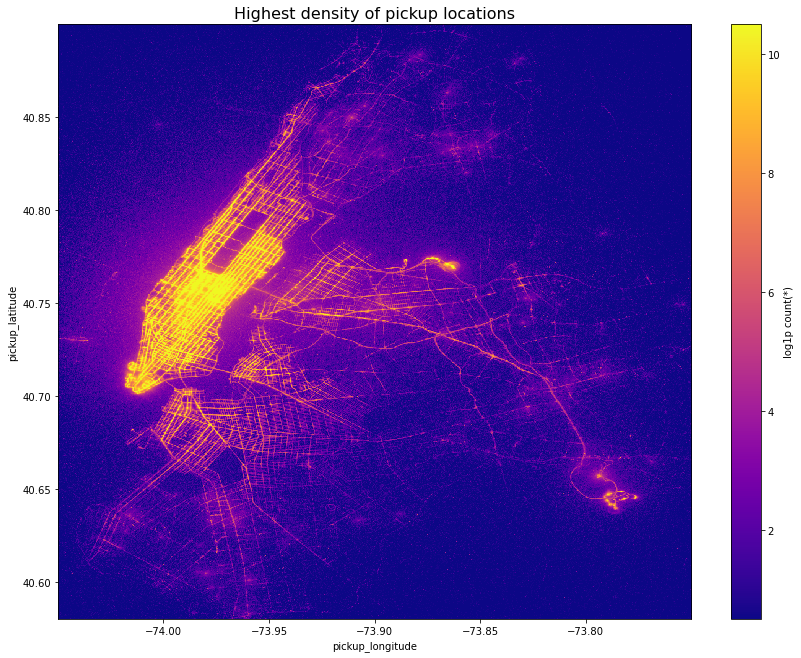

In [59]:
# Overall density map of pickup locations
plt.figure(figsize=(12, 9))
df.viz.heatmap(df.pickup_longitude, df.pickup_latitude, 
               colorbar=True, colormap='plasma', f='log1p', shape=1024, vmin=0.5, vmax=10.5)
plt.title('Highest density of pickup locations', fontsize=fontsize)
plt.show()

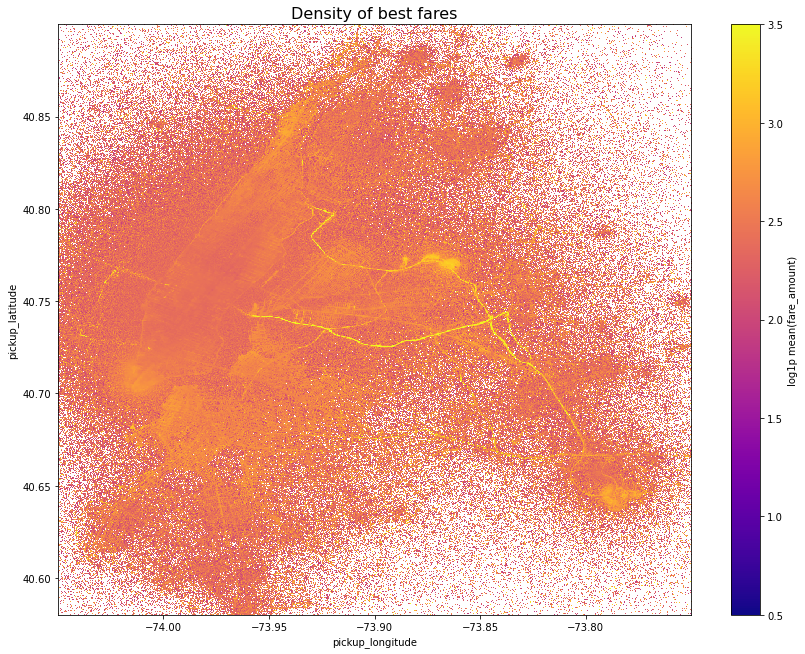

In [60]:
# Overall density map of pickup locations
plt.figure(figsize=(12, 9))
df.viz.heatmap(df.pickup_longitude, df.pickup_latitude, 
               what='mean(fare_amount)',
               colorbar=True, colormap='plasma', f='log1p', shape=1024, vmin=0.5, vmax=3.5)
plt.title('Density of best fares', fontsize=fontsize)
plt.show()

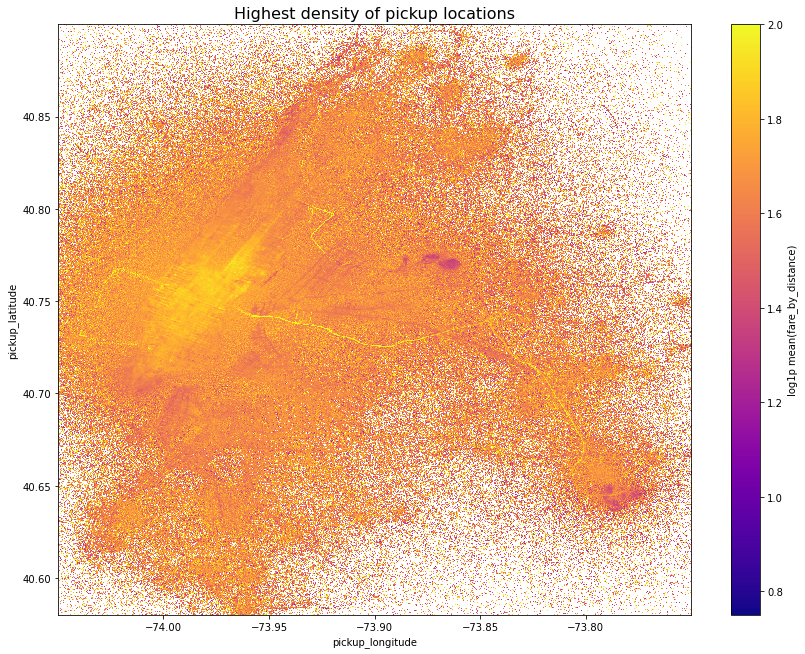

In [61]:
# Overall density map of pickup locations
plt.figure(figsize=(12, 9))
df.viz.heatmap(df.pickup_longitude, df.pickup_latitude, 
               what='mean(fare_by_distance)',
               colorbar=True, colormap='plasma', f='log1p', shape=1024, vmin=0.75, vmax=2.)
plt.title('Highest density of pickup locations', fontsize=fontsize)
plt.show()